# Using the SMABacktester Class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
df

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012
...,...,...,...
2020-06-24,0.61349,1.131235,0.79841
2020-06-25,0.60938,1.125087,0.80561
2020-06-26,0.61373,1.122208,0.80480


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2004-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDEUR=X  4274 non-null   float64
 1   EURUSD=X  4275 non-null   float64
 2   USDGBP=X  4287 non-null   float64
dtypes: float64(3)
memory usage: 134.2 KB


## Building the SMABackter Class from scratch

In [5]:
import SMABacktester as SMA

In [6]:
tester = SMA.SMABacktester("AUDEUR=X",50,200,"2004-01-01","2020-06-30")

In [7]:
tester.symbol

'AUDEUR=X'

In [8]:
tester.SMA_L

200

In [9]:
tester.results

In [10]:
tester.data

,price,returns,SMA_S,SMA_L
Date,,,,
2004-01-01,0.59780,NaN,NaN,NaN
2004-01-02,0.60314,0.008893,NaN,NaN
2004-01-05,0.60467,0.002533,NaN,NaN
2004-01-06,0.60350,-0.001937,NaN,NaN
2004-01-07,0.60728,0.006244,NaN,NaN
...,...,...,...,...
2020-06-24,0.61349,-0.001612,0.600626,0.603695
2020-06-25,0.60938,-0.006722,0.601243,0.603684
2020-06-26,0.61373,0.007113,0.601806,0.603706


In [11]:
tester.data.isna().sum()

price        0
returns      1
SMA_S       49
SMA_L      199
dtype: int64

### Method - Set Parameters

In [12]:
tester.set_parameters(25,150)

In [13]:
tester.data.isna().sum()

price        0
returns      1
SMA_S       24
SMA_L      149
dtype: int64

### Method - Test Strategy

In [14]:
tester = SMA.SMABacktester("EURUSD=X", 50,200,"2004-01-01","2020-06-30")

In [15]:
tester.test_strategy()

(1.2835, 0.367674)

In [16]:
tester.data

,price,returns,SMA_S,SMA_L
Date,,,,
2004-01-01,1.258194,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,NaN,NaN
2004-01-05,1.268698,0.008313,NaN,NaN
2004-01-06,1.272103,0.002681,NaN,NaN
2004-01-07,1.264095,-0.006315,NaN,NaN
...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.103430
2020-06-25,1.125087,-0.005449,1.102486,1.103540
2020-06-26,1.122208,-0.002562,1.103213,1.103627


In [17]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,0.001475,1.221840,1.226081,-1,-0.001475,1.001476,0.998526
2004-10-08,1.241003,0.008982,1.222628,1.225995,-1,-0.008982,1.010511,0.989598
2004-10-11,1.238405,-0.002095,1.223352,1.225843,-1,0.002095,1.008396,0.991673
2004-10-12,1.232104,-0.005102,1.223888,1.225643,-1,0.005102,1.003265,0.996746
2004-10-13,1.234903,0.002270,1.224466,1.225497,-1,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.103430,-1,-0.002892,0.921130,1.271272
2020-06-25,1.125087,-0.005449,1.102486,1.103540,-1,0.005449,0.916125,1.278218
2020-06-26,1.122208,-0.002562,1.103213,1.103627,-1,0.002562,0.913781,1.281497


### Plot Results

In [18]:
tester = SMA.SMABacktester("EURUSD=X",50,200,"2004-01-01", "2020-06-30")

In [19]:
tester.plot_results()

No results to plot yet. Run a strategy


In [20]:
tester.test_strategy()

(1.2835, 0.367674)

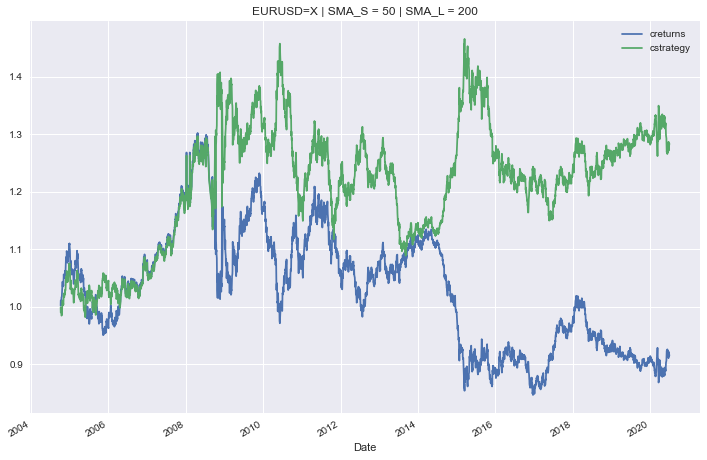

In [21]:
tester.plot_results()

### Update and Run Method

In [22]:
tester = SMA.SMABacktester("EURUSD=X",50, 200, "2004-01-01","2020-06-30")

In [23]:
tester.test_strategy()

(1.2835, 0.367674)

In [24]:
tester.update_and_run((25,150))

-1.586563

### Optimizer Parameters

In [28]:
tester = SMA.SMABacktester("EURUSD=X",10, 101, "2004-01-01","2020-06-30")

In [30]:
tester.test_strategy()

(0.901791, -0.038846)

In [31]:
tester.optimize_parameters((10,50,1),(100,252,1))

(array([ 46., 137.]), 2.526694)